In [1]:
import numpy as np
import openturns as ot
from depimpact import ConservativeEstimate, quantile_func
from depimpact.tests import func_sum
from depimpact.plots import set_style_paper, matrix_plot_quantities
import matplotlib.pyplot as plt

set_style_paper()

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/D58174/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
dim = 5
grid_type = 'lhs'
dep_measure = 'kendall'
K = 500
n = 100000
alpha = 0.01

margins = [ot.Normal()]*dim
q_func = quantile_func(alpha)

In [ ]:
cop_ids = [1, 3, 4, 6]
grid_results = {}
for cop_id in cop_ids:
    families = np.tril(np.ones((dim, dim), dtype=int)*cop_id, k=-1)
    quant_estimate = ConservativeEstimate(model_func=func_sum, margins=margins, families=families)
    grid_result = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, dep_measure=dep_measure)
    grid_result.q_func = q_func
    min_result = grid_result.min_result
    print('Minimum quantile: {} at param: {}'.format(min_result.quantity, min_result.kendall_tau))
    grid_results[cop_id] = grid_result

Minimum quantile: -9.162647874478274 at param: [0.16659999999999986, -0.43708, 0.8643600000000001, 0.9584399999999994, 0.8251600000000001, 0.7154]


In [ ]:
from depimpact.plots import plot_quantities
    
labels = ['Copula %d' % (cop_id) for cop_id in cop_ids]
results = list(grid_results.values())
fig, axes = plot_quantities(results, quantity_name='Quantile', label=labels, plot_scatter=False, n_bins=12)
fig.tight_layout()

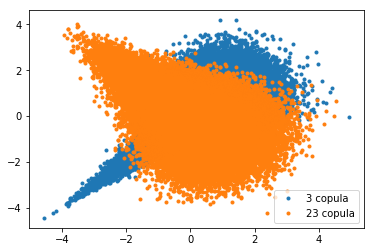

In [12]:
cop_id = 3
for cop_id in [3, 23]:
    x = grid_results[cop_id].input_samples[2]
    plt.plot(x[:, 0], x[:, 1], '.', label='%d copula' % (cop_id))
    plt.legend(loc=0)

In [84]:
dim = 4
families = np.tril(np.ones((dim, dim), dtype=int), k=-1)
families

families[np.triu_indices(dim, k=0)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])